# MNIST: Ghost Batch Normalization & L1/L2 Regularization
---

## Run the same model with the following modifications:
- with L1 + BN
- with L2 + BN
- with L1 and L2 with BN
- with GBN
- with L1 and L2 with GBN

For 25 epochs


## The consistent components of the model is:
- Contains 8 layers with following number of kernels:
  - Conv 8 -> Conv 7 -> Bottlenck -> Conv 16 -> Conv 16 -> Conv 16 -> Conv 0 -> GAP
  - Bottleneck layer = Maxpool + 1x1 Conv
- Only 3x3 convolution used everywhere (except for the bottleneck & GAP layers
- Except the bottleneck & last Conv layer, every convolution is followed by "RELU" & "Batch Normalization"
- No padding has been used anywhere

---

## SCRIPT SECTION
---

### Setup Google Drive for saving / reloading previous saved values

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

module_folder = 'drive/My Drive/eva_stored_from_colab/eva5/mnist_gbn_reg/'
base_folder = module_folder+'trained_weights/'
anlt_folder = module_folder+'analysis_materials/'
acc_recorder_files = ["maxAcc_bn_l1", "maxAcc_bn_l2", "maxAcc_bn_l1l2", "maxAcc_gbn", "maxAcc_gbn_l1l2"]
model_file_names = ["mdl_bn_l1", "mdl_bn_l2", "mdl_bn_l1l2", "mdl_gbn", "mdl_gbn_l1l2"]

Mounted at /content/drive


### Import required modules & set module level requirements

In [2]:
from __future__ import print_function
from operator import itemgetter
import time
import sys
sys.path.append(module_folder)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

#import raw_models
from raw_models import with_bn, with_gbn
import custom_utils
from custom_utils import helpers
from custom_utils import analytics

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Calculating total parameters

In [3]:
# !pip install torchsummary
# from torchsummary import summary
# model = Net().to(device)
# summary(model, input_size=(1, 28, 28))

### Downloading the MNIST dataset

In [4]:
torch.manual_seed(1)
batch_size = 128

train_ds = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        torchvision.transforms.RandomRotation(degrees=7),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))

test_ds = datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    train_ds,
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    test_ds,
    batch_size=batch_size, shuffle=True, **kwargs)


### L1 with Batch Normalization

In [5]:
fn_idx = 0
epochs = 26

model = with_bn.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0, momentum=0.9)
loss_func = helpers.add_l1_reg(F.nll_loss, model=model, lambda_l1=0.001)

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"


l1_bn_res = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)


  0%|          | 0/469 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.0

EPOCH NUM 1


loss=0.38068026304244995 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.54it/s]


Train Data: Average loss: 0.0045, Accuracy: 56995/60000 (94.9917%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2043, Accuracy: 9402/10000 (94.0200%)

-----------------------------------------------

EPOCH NUM 2


loss=0.37293243408203125 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]


Train Data: Average loss: 0.0033, Accuracy: 57937/60000 (96.5617%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1575, Accuracy: 9505/10000 (95.0500%)

-----------------------------------------------

EPOCH NUM 3


loss=0.42058879137039185 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.36it/s]



Train Data: Average loss: 0.0031, Accuracy: 57949/60000 (96.5817%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1751, Accuracy: 9451/10000 (94.5100%)

-----------------------------------------------

EPOCH NUM 4


loss=0.44177567958831787 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.38it/s]


Train Data: Average loss: 0.0031, Accuracy: 58011/60000 (96.6850%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0804, Accuracy: 9771/10000 (97.7100%)

-----------------------------------------------

EPOCH NUM 5


loss=0.4391305446624756 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.04it/s]


Train Data: Average loss: 0.0030, Accuracy: 57966/60000 (96.6100%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2424, Accuracy: 9256/10000 (92.5600%)

-----------------------------------------------

EPOCH NUM 6


loss=0.39664608240127563 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]


Train Data: Average loss: 0.0030, Accuracy: 57993/60000 (96.6550%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1308, Accuracy: 9615/10000 (96.1500%)

-----------------------------------------------

EPOCH NUM 7


loss=0.43188315629959106 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.42it/s]


Train Data: Average loss: 0.0030, Accuracy: 57930/60000 (96.5500%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1652, Accuracy: 9506/10000 (95.0600%)

-----------------------------------------------

EPOCH NUM 8


loss=0.4241366982460022 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]


Train Data: Average loss: 0.0029, Accuracy: 58030/60000 (96.7167%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0884, Accuracy: 9753/10000 (97.5300%)

-----------------------------------------------

EPOCH NUM 9


loss=0.3656827509403229 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.45it/s]


Train Data: Average loss: 0.0029, Accuracy: 58064/60000 (96.7733%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1415, Accuracy: 9560/10000 (95.6000%)

-----------------------------------------------

EPOCH NUM 10


loss=0.3401546776294708 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.46it/s]


Train Data: Average loss: 0.0029, Accuracy: 57981/60000 (96.6350%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1956, Accuracy: 9390/10000 (93.9000%)

-----------------------------------------------

EPOCH NUM 11


loss=0.3754395544528961 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.74it/s]


Train Data: Average loss: 0.0029, Accuracy: 58024/60000 (96.7067%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0984, Accuracy: 9732/10000 (97.3200%)

-----------------------------------------------

EPOCH NUM 12


loss=0.33832502365112305 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]


Train Data: Average loss: 0.0029, Accuracy: 57997/60000 (96.6617%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1802, Accuracy: 9443/10000 (94.4300%)

-----------------------------------------------

EPOCH NUM 13


loss=0.3970147967338562 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Train Data: Average loss: 0.0029, Accuracy: 57988/60000 (96.6467%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1165, Accuracy: 9698/10000 (96.9800%)

-----------------------------------------------

EPOCH NUM 14


loss=0.36757710576057434 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Train Data: Average loss: 0.0029, Accuracy: 57966/60000 (96.6100%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0694, Accuracy: 9822/10000 (98.2200%)

-----------------------------------------------

EPOCH NUM 15


loss=0.3454834818840027 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.48it/s]


Train Data: Average loss: 0.0029, Accuracy: 57967/60000 (96.6117%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1862, Accuracy: 9428/10000 (94.2800%)

-----------------------------------------------

EPOCH NUM 16


loss=0.3876633048057556 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.59it/s]


Train Data: Average loss: 0.0029, Accuracy: 58023/60000 (96.7050%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1163, Accuracy: 9675/10000 (96.7500%)

-----------------------------------------------

EPOCH NUM 17


loss=0.30917054414749146 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.44it/s]


Train Data: Average loss: 0.0029, Accuracy: 58045/60000 (96.7417%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1490, Accuracy: 9520/10000 (95.2000%)

-----------------------------------------------

EPOCH NUM 18


loss=0.3431243300437927 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.28it/s]


Train Data: Average loss: 0.0029, Accuracy: 58062/60000 (96.7700%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1257, Accuracy: 9613/10000 (96.1300%)

-----------------------------------------------

EPOCH NUM 19


loss=0.43672454357147217 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.45it/s]


Train Data: Average loss: 0.0029, Accuracy: 57997/60000 (96.6617%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1083, Accuracy: 9686/10000 (96.8600%)

-----------------------------------------------

EPOCH NUM 20


loss=0.499711275100708 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]


Train Data: Average loss: 0.0029, Accuracy: 58000/60000 (96.6667%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1174, Accuracy: 9662/10000 (96.6200%)

-----------------------------------------------

EPOCH NUM 21


loss=0.4018232822418213 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.59it/s]


Train Data: Average loss: 0.0029, Accuracy: 58028/60000 (96.7133%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1281, Accuracy: 9599/10000 (95.9900%)

-----------------------------------------------

EPOCH NUM 22


loss=0.4556593894958496 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Train Data: Average loss: 0.0029, Accuracy: 57967/60000 (96.6117%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1045, Accuracy: 9712/10000 (97.1200%)

-----------------------------------------------

EPOCH NUM 23


loss=0.4120747447013855 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]


Train Data: Average loss: 0.0029, Accuracy: 58021/60000 (96.7017%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0995, Accuracy: 9703/10000 (97.0300%)

-----------------------------------------------

EPOCH NUM 24


loss=0.44907569885253906 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.54it/s]


Train Data: Average loss: 0.0029, Accuracy: 57987/60000 (96.6450%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1181, Accuracy: 9630/10000 (96.3000%)

-----------------------------------------------

EPOCH NUM 25


loss=0.3447769284248352 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Train Data: Average loss: 0.0029, Accuracy: 58013/60000 (96.6883%)




Test set: Average loss: 0.1187, Accuracy: 9670/10000 (96.7000%)

-----------------------------------------------
TOTAL TRAINING TIME:  606.2703261375427
LAST 10 EPOCH AVG ACC:  0.9647
LAST 5 EPOCH AVG ACC:  0.9662799999999999
MAX ACCURACY:  0.9822


### L2 with Batch Normalization

In [6]:
fn_idx = 1
epochs = 26

model = with_bn.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.001, momentum=0.9)
loss_func = F.nll_loss

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"


l2_bn_res = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)


  0%|          | 0/469 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.0

EPOCH NUM 1


loss=0.06451857835054398 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.27it/s]


Train Data: Average loss: 0.0013, Accuracy: 57792/60000 (96.3200%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0890, Accuracy: 9805/10000 (98.0500%)

-----------------------------------------------

EPOCH NUM 2


loss=0.0671740174293518 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]


Train Data: Average loss: 0.0006, Accuracy: 58934/60000 (98.2233%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0659, Accuracy: 9848/10000 (98.4800%)

-----------------------------------------------

EPOCH NUM 3


loss=0.032188624143600464 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]


Train Data: Average loss: 0.0006, Accuracy: 58946/60000 (98.2433%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0529, Accuracy: 9845/10000 (98.4500%)

-----------------------------------------------

EPOCH NUM 4


loss=0.05657942220568657 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.43it/s]


Train Data: Average loss: 0.0005, Accuracy: 58969/60000 (98.2817%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0520, Accuracy: 9885/10000 (98.8500%)

-----------------------------------------------

EPOCH NUM 5


loss=0.1228194311261177 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]


Train Data: Average loss: 0.0005, Accuracy: 58961/60000 (98.2683%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0582, Accuracy: 9862/10000 (98.6200%)

-----------------------------------------------

EPOCH NUM 6


loss=0.03706081584095955 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]


Train Data: Average loss: 0.0005, Accuracy: 59047/60000 (98.4117%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0654, Accuracy: 9839/10000 (98.3900%)

-----------------------------------------------

EPOCH NUM 7


loss=0.039758194237947464 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.52it/s]


Train Data: Average loss: 0.0005, Accuracy: 59019/60000 (98.3650%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0493, Accuracy: 9905/10000 (99.0500%)

-----------------------------------------------

EPOCH NUM 8


loss=0.03143821284174919 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.68it/s]


Train Data: Average loss: 0.0005, Accuracy: 59060/60000 (98.4333%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0504, Accuracy: 9864/10000 (98.6400%)

-----------------------------------------------

EPOCH NUM 9


loss=0.07625846564769745 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.74it/s]


Train Data: Average loss: 0.0005, Accuracy: 59041/60000 (98.4017%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0402, Accuracy: 9898/10000 (98.9800%)

-----------------------------------------------

EPOCH NUM 10


loss=0.06884760409593582 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s]


Train Data: Average loss: 0.0005, Accuracy: 59058/60000 (98.4300%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0601, Accuracy: 9875/10000 (98.7500%)

-----------------------------------------------

EPOCH NUM 11


loss=0.04596174135804176 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]


Train Data: Average loss: 0.0005, Accuracy: 59066/60000 (98.4433%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0661, Accuracy: 9839/10000 (98.3900%)

-----------------------------------------------

EPOCH NUM 12


loss=0.07770929485559464 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.84it/s]


Train Data: Average loss: 0.0005, Accuracy: 59068/60000 (98.4467%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0478, Accuracy: 9866/10000 (98.6600%)

-----------------------------------------------

EPOCH NUM 13


loss=0.10091466456651688 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]


Train Data: Average loss: 0.0005, Accuracy: 59040/60000 (98.4000%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0455, Accuracy: 9867/10000 (98.6700%)

-----------------------------------------------

EPOCH NUM 14


loss=0.03148587420582771 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Train Data: Average loss: 0.0005, Accuracy: 59079/60000 (98.4650%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0551, Accuracy: 9850/10000 (98.5000%)

-----------------------------------------------

EPOCH NUM 15


loss=0.04276135563850403 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.43it/s]


Train Data: Average loss: 0.0005, Accuracy: 59016/60000 (98.3600%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0500, Accuracy: 9881/10000 (98.8100%)

-----------------------------------------------

EPOCH NUM 16


loss=0.03154585137963295 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.56it/s]


Train Data: Average loss: 0.0005, Accuracy: 59108/60000 (98.5133%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0559, Accuracy: 9850/10000 (98.5000%)

-----------------------------------------------

EPOCH NUM 17


loss=0.04446326196193695 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.53it/s]


Train Data: Average loss: 0.0005, Accuracy: 59084/60000 (98.4733%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0461, Accuracy: 9883/10000 (98.8300%)

-----------------------------------------------

EPOCH NUM 18


loss=0.08209598064422607 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.49it/s]


Train Data: Average loss: 0.0005, Accuracy: 59084/60000 (98.4733%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0588, Accuracy: 9857/10000 (98.5700%)

-----------------------------------------------

EPOCH NUM 19


loss=0.06558265537023544 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.32it/s]


Train Data: Average loss: 0.0005, Accuracy: 59139/60000 (98.5650%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0483, Accuracy: 9889/10000 (98.8900%)

-----------------------------------------------

EPOCH NUM 20


loss=0.13047616183757782 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.19it/s]


Train Data: Average loss: 0.0005, Accuracy: 59081/60000 (98.4683%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0541, Accuracy: 9878/10000 (98.7800%)

-----------------------------------------------

EPOCH NUM 21


loss=0.05730883404612541 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]


Train Data: Average loss: 0.0005, Accuracy: 59082/60000 (98.4700%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0769, Accuracy: 9809/10000 (98.0900%)

-----------------------------------------------

EPOCH NUM 22


loss=0.06055651605129242 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s]


Train Data: Average loss: 0.0005, Accuracy: 59107/60000 (98.5117%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0662, Accuracy: 9827/10000 (98.2700%)

-----------------------------------------------

EPOCH NUM 23


loss=0.04930046200752258 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.29it/s]



Train Data: Average loss: 0.0005, Accuracy: 59082/60000 (98.4700%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Accuracy: 9883/10000 (98.8300%)

-----------------------------------------------

EPOCH NUM 24


loss=0.03203145042061806 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.57it/s]


Train Data: Average loss: 0.0005, Accuracy: 59130/60000 (98.5500%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0421, Accuracy: 9901/10000 (99.0100%)

-----------------------------------------------

EPOCH NUM 25


loss=0.059522178024053574 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s]


Train Data: Average loss: 0.0005, Accuracy: 59074/60000 (98.4567%)




Test set: Average loss: 0.0579, Accuracy: 9850/10000 (98.5000%)

-----------------------------------------------
TOTAL TRAINING TIME:  581.8164386749268
LAST 10 EPOCH AVG ACC:  0.98627
LAST 5 EPOCH AVG ACC:  0.9854
MAX ACCURACY:  0.9905


### L1 & L2 with Batch Normalization

In [7]:
fn_idx = 2
epochs = 26

model = with_bn.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.001, momentum=0.9)
loss_func = helpers.add_l1_reg(F.nll_loss, model=model, lambda_l1=0.001)

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"


l1l2_bn_res = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)


  0%|          | 0/469 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.0

EPOCH NUM 1


loss=0.37181228399276733 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.04it/s]


Train Data: Average loss: 0.0045, Accuracy: 56804/60000 (94.6733%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1487, Accuracy: 9572/10000 (95.7200%)

-----------------------------------------------

EPOCH NUM 2


loss=0.3866298794746399 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.13it/s]


Train Data: Average loss: 0.0032, Accuracy: 57698/60000 (96.1633%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3350, Accuracy: 8990/10000 (89.9000%)

-----------------------------------------------

EPOCH NUM 3


loss=0.4699031114578247 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Train Data: Average loss: 0.0030, Accuracy: 57721/60000 (96.2017%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2359, Accuracy: 9277/10000 (92.7700%)

-----------------------------------------------

EPOCH NUM 4


loss=0.4213554859161377 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.79it/s]


Train Data: Average loss: 0.0030, Accuracy: 57771/60000 (96.2850%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3069, Accuracy: 9146/10000 (91.4600%)

-----------------------------------------------

EPOCH NUM 5


loss=0.3837735056877136 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.22it/s]


Train Data: Average loss: 0.0030, Accuracy: 57658/60000 (96.0967%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2062, Accuracy: 9375/10000 (93.7500%)

-----------------------------------------------

EPOCH NUM 6


loss=0.4359506368637085 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Train Data: Average loss: 0.0030, Accuracy: 57744/60000 (96.2400%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1882, Accuracy: 9445/10000 (94.4500%)

-----------------------------------------------

EPOCH NUM 7


loss=0.37118029594421387 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Train Data: Average loss: 0.0029, Accuracy: 57770/60000 (96.2833%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4647, Accuracy: 8701/10000 (87.0100%)

-----------------------------------------------

EPOCH NUM 8


loss=0.3026382625102997 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Train Data: Average loss: 0.0029, Accuracy: 57695/60000 (96.1583%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1439, Accuracy: 9597/10000 (95.9700%)

-----------------------------------------------

EPOCH NUM 9


loss=0.35823628306388855 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Train Data: Average loss: 0.0029, Accuracy: 57782/60000 (96.3033%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1803, Accuracy: 9643/10000 (96.4300%)

-----------------------------------------------

EPOCH NUM 10


loss=0.4456503987312317 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.06it/s]


Train Data: Average loss: 0.0029, Accuracy: 57805/60000 (96.3417%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4218, Accuracy: 8622/10000 (86.2200%)

-----------------------------------------------

EPOCH NUM 11


loss=0.36620283126831055 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.03it/s]


Train Data: Average loss: 0.0029, Accuracy: 57739/60000 (96.2317%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1731, Accuracy: 9551/10000 (95.5100%)

-----------------------------------------------

EPOCH NUM 12


loss=0.28686684370040894 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.34it/s]


Train Data: Average loss: 0.0029, Accuracy: 57812/60000 (96.3533%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3968, Accuracy: 8680/10000 (86.8000%)

-----------------------------------------------

EPOCH NUM 13


loss=0.4473330080509186 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.41it/s]


Train Data: Average loss: 0.0029, Accuracy: 57757/60000 (96.2617%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2162, Accuracy: 9357/10000 (93.5700%)

-----------------------------------------------

EPOCH NUM 14


loss=0.371780127286911 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.48it/s]


Train Data: Average loss: 0.0029, Accuracy: 57777/60000 (96.2950%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1964, Accuracy: 9450/10000 (94.5000%)

-----------------------------------------------

EPOCH NUM 15


loss=0.323863685131073 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Train Data: Average loss: 0.0029, Accuracy: 57816/60000 (96.3600%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2353, Accuracy: 9304/10000 (93.0400%)

-----------------------------------------------

EPOCH NUM 16


loss=0.3510851263999939 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.31it/s]


Train Data: Average loss: 0.0030, Accuracy: 57706/60000 (96.1767%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3428, Accuracy: 8853/10000 (88.5300%)

-----------------------------------------------

EPOCH NUM 17


loss=0.41666027903556824 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.45it/s]


Train Data: Average loss: 0.0029, Accuracy: 57766/60000 (96.2767%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2709, Accuracy: 9320/10000 (93.2000%)

-----------------------------------------------

EPOCH NUM 18


loss=0.49929141998291016 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]


Train Data: Average loss: 0.0029, Accuracy: 57819/60000 (96.3650%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1606, Accuracy: 9577/10000 (95.7700%)

-----------------------------------------------

EPOCH NUM 19


loss=0.39331120252609253 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.31it/s]


Train Data: Average loss: 0.0028, Accuracy: 57827/60000 (96.3783%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4431, Accuracy: 8427/10000 (84.2700%)

-----------------------------------------------

EPOCH NUM 20


loss=0.3734705150127411 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]


Train Data: Average loss: 0.0029, Accuracy: 57835/60000 (96.3917%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1714, Accuracy: 9498/10000 (94.9800%)

-----------------------------------------------

EPOCH NUM 21


loss=0.3181006908416748 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.41it/s]


Train Data: Average loss: 0.0029, Accuracy: 57769/60000 (96.2817%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2093, Accuracy: 9596/10000 (95.9600%)

-----------------------------------------------

EPOCH NUM 22


loss=0.4316256046295166 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.32it/s]


Train Data: Average loss: 0.0028, Accuracy: 57879/60000 (96.4650%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2430, Accuracy: 9380/10000 (93.8000%)

-----------------------------------------------

EPOCH NUM 23


loss=0.2978615462779999 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.21it/s]


Train Data: Average loss: 0.0029, Accuracy: 57752/60000 (96.2533%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1650, Accuracy: 9511/10000 (95.1100%)

-----------------------------------------------

EPOCH NUM 24


loss=0.3847697377204895 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Train Data: Average loss: 0.0029, Accuracy: 57821/60000 (96.3683%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1573, Accuracy: 9566/10000 (95.6600%)

-----------------------------------------------

EPOCH NUM 25


loss=0.33755314350128174 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.42it/s]


Train Data: Average loss: 0.0028, Accuracy: 57761/60000 (96.2683%)




Test set: Average loss: 0.1564, Accuracy: 9555/10000 (95.5500%)

-----------------------------------------------
TOTAL TRAINING TIME:  612.6272821426392
LAST 10 EPOCH AVG ACC:  0.93283
LAST 5 EPOCH AVG ACC:  0.9521599999999999
MAX ACCURACY:  0.9643


### Ghost Batch Normalization

In [8]:
fn_idx = 3
epochs = 26

model = with_gbn.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.0, momentum=0.9)
loss_func = F.nll_loss

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"


gbn_res = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)


  0%|          | 0/469 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.0

EPOCH NUM 1


loss=0.09521009773015976 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]


Train Data: Average loss: 0.0015, Accuracy: 57075/60000 (95.1250%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0491, Accuracy: 9864/10000 (98.6400%)

-----------------------------------------------

EPOCH NUM 2


loss=0.054819315671920776 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.16it/s]


Train Data: Average loss: 0.0006, Accuracy: 58773/60000 (97.9550%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9898/10000 (98.9800%)

-----------------------------------------------

EPOCH NUM 3


loss=0.07172903418540955 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.25it/s]


Train Data: Average loss: 0.0005, Accuracy: 58992/60000 (98.3200%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9900/10000 (99.0000%)

-----------------------------------------------

EPOCH NUM 4


loss=0.041124723851680756 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.78it/s]



Train Data: Average loss: 0.0004, Accuracy: 59150/60000 (98.5833%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9909/10000 (99.0900%)

-----------------------------------------------

EPOCH NUM 5


loss=0.04115738719701767 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.25it/s]


Train Data: Average loss: 0.0004, Accuracy: 59201/60000 (98.6683%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9918/10000 (99.1800%)

-----------------------------------------------

EPOCH NUM 6


loss=0.06854531913995743 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.12it/s]



Train Data: Average loss: 0.0003, Accuracy: 59275/60000 (98.7917%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9930/10000 (99.3000%)

-----------------------------------------------

EPOCH NUM 7


loss=0.03382406756281853 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.16it/s]


Train Data: Average loss: 0.0003, Accuracy: 59360/60000 (98.9333%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9922/10000 (99.2200%)

-----------------------------------------------

EPOCH NUM 8


loss=0.04589724540710449 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.11it/s]


Train Data: Average loss: 0.0003, Accuracy: 59303/60000 (98.8383%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9908/10000 (99.0800%)

-----------------------------------------------

EPOCH NUM 9


loss=0.03422592207789421 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.35it/s]



Train Data: Average loss: 0.0003, Accuracy: 59390/60000 (98.9833%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9918/10000 (99.1800%)

-----------------------------------------------

EPOCH NUM 10


loss=0.02445562183856964 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.22it/s]



Train Data: Average loss: 0.0003, Accuracy: 59414/60000 (99.0233%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9929/10000 (99.2900%)

-----------------------------------------------

EPOCH NUM 11


loss=0.08706467598676682 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.17it/s]


Train Data: Average loss: 0.0002, Accuracy: 59440/60000 (99.0667%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9921/10000 (99.2100%)

-----------------------------------------------

EPOCH NUM 12


loss=0.01215155515819788 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.39it/s]


Train Data: Average loss: 0.0002, Accuracy: 59463/60000 (99.1050%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9931/10000 (99.3100%)

-----------------------------------------------

EPOCH NUM 13


loss=0.06156151369214058 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.90it/s]



Train Data: Average loss: 0.0002, Accuracy: 59507/60000 (99.1783%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9913/10000 (99.1300%)

-----------------------------------------------

EPOCH NUM 14


loss=0.07234494388103485 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.91it/s]



Train Data: Average loss: 0.0002, Accuracy: 59520/60000 (99.2000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9927/10000 (99.2700%)

-----------------------------------------------

EPOCH NUM 15


loss=0.02643546648323536 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.27it/s]



Train Data: Average loss: 0.0002, Accuracy: 59535/60000 (99.2250%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9933/10000 (99.3300%)

-----------------------------------------------

EPOCH NUM 16


loss=0.030721919611096382 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.25it/s]


Train Data: Average loss: 0.0002, Accuracy: 59518/60000 (99.1967%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9935/10000 (99.3500%)

-----------------------------------------------

EPOCH NUM 17


loss=0.02955876849591732 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s]



Train Data: Average loss: 0.0002, Accuracy: 59532/60000 (99.2200%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.4100%)

-----------------------------------------------

EPOCH NUM 18


loss=0.00421724421903491 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.26it/s]



Train Data: Average loss: 0.0002, Accuracy: 59520/60000 (99.2000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9946/10000 (99.4600%)

-----------------------------------------------

EPOCH NUM 19


loss=0.15393315255641937 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.11it/s]


Train Data: Average loss: 0.0002, Accuracy: 59554/60000 (99.2567%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9937/10000 (99.3700%)

-----------------------------------------------

EPOCH NUM 20


loss=0.011618979275226593 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.29it/s]


Train Data: Average loss: 0.0002, Accuracy: 59576/60000 (99.2933%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9932/10000 (99.3200%)

-----------------------------------------------

EPOCH NUM 21


loss=0.012899252586066723 batch_id=468: 100%|██████████| 469/469 [00:20<00:00, 22.36it/s]



Train Data: Average loss: 0.0002, Accuracy: 59584/60000 (99.3067%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9935/10000 (99.3500%)

-----------------------------------------------

EPOCH NUM 22


loss=0.0036872841883450747 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.95it/s]



Train Data: Average loss: 0.0002, Accuracy: 59595/60000 (99.3250%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9947/10000 (99.4700%)

-----------------------------------------------

EPOCH NUM 23


loss=0.0071008470840752125 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.20it/s]


Train Data: Average loss: 0.0002, Accuracy: 59574/60000 (99.2900%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9912/10000 (99.1200%)

-----------------------------------------------

EPOCH NUM 24


loss=0.020207282155752182 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.21it/s]


Train Data: Average loss: 0.0002, Accuracy: 59612/60000 (99.3533%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9928/10000 (99.2800%)

-----------------------------------------------

EPOCH NUM 25


loss=0.015671979635953903 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 22.31it/s]


Train Data: Average loss: 0.0002, Accuracy: 59633/60000 (99.3883%)




Test set: Average loss: 0.0210, Accuracy: 9928/10000 (99.2800%)

-----------------------------------------------
TOTAL TRAINING TIME:  587.4300420284271
LAST 10 EPOCH AVG ACC:  0.9934100000000001
LAST 5 EPOCH AVG ACC:  0.993
MAX ACCURACY:  0.9947


### L1 & L2 with Ghost Batch Nromalization

In [9]:
fn_idx = 4
epochs = 26

model = with_gbn.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.001, momentum=0.9)
loss_func = helpers.add_l1_reg(F.nll_loss, model=model, lambda_l1=0.001)

acc_recorder_file = acc_recorder_files[fn_idx]
model_file_name = model_file_names[fn_idx]

accuracy_store_path = base_folder+acc_recorder_file
model_sd_save_path = base_folder+model_file_name+"_sd.pth"


l1l2_gbn_res = helpers.train_epochs(
                    model=model, 
                    device=device, 
                    train_loader=train_loader,
                    test_loader=test_loader, 
                    optimizer=optimizer, 
                    loss_func=loss_func, 
                    epochs=epochs,
                    accuracy_store_path=accuracy_store_path, 
                    model_sd_save_path=model_sd_save_path,
                    save_if_better_acc=True)


  0%|          | 0/469 [00:00<?, ?it/s]


LAST RECORDED MAX ACCURACY:  0.0

EPOCH NUM 1


loss=0.4155513644218445 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.95it/s]



Train Data: Average loss: 0.0047, Accuracy: 56310/60000 (93.8500%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1934, Accuracy: 9600/10000 (96.0000%)

-----------------------------------------------

EPOCH NUM 2


loss=0.4338419437408447 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.88it/s]


Train Data: Average loss: 0.0035, Accuracy: 57273/60000 (95.4550%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2633, Accuracy: 9178/10000 (91.7800%)

-----------------------------------------------

EPOCH NUM 3


loss=0.4632495641708374 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.82it/s]


Train Data: Average loss: 0.0033, Accuracy: 57344/60000 (95.5733%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3741, Accuracy: 8856/10000 (88.5600%)

-----------------------------------------------

EPOCH NUM 4


loss=0.45481938123703003 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.03it/s]


Train Data: Average loss: 0.0033, Accuracy: 57306/60000 (95.5100%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1641, Accuracy: 9572/10000 (95.7200%)

-----------------------------------------------

EPOCH NUM 5


loss=0.4315464496612549 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 20.65it/s]


Train Data: Average loss: 0.0033, Accuracy: 57302/60000 (95.5033%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2086, Accuracy: 9458/10000 (94.5800%)

-----------------------------------------------

EPOCH NUM 6


loss=0.3745725154876709 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.05it/s]


Train Data: Average loss: 0.0033, Accuracy: 57283/60000 (95.4717%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1285, Accuracy: 9693/10000 (96.9300%)

-----------------------------------------------

EPOCH NUM 7


loss=0.3745453655719757 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.20it/s]


Train Data: Average loss: 0.0032, Accuracy: 57289/60000 (95.4817%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3354, Accuracy: 9320/10000 (93.2000%)

-----------------------------------------------

EPOCH NUM 8


loss=0.4210647940635681 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.45it/s]



Train Data: Average loss: 0.0032, Accuracy: 57324/60000 (95.5400%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2115, Accuracy: 9446/10000 (94.4600%)

-----------------------------------------------

EPOCH NUM 9


loss=0.45556139945983887 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]


Train Data: Average loss: 0.0032, Accuracy: 57275/60000 (95.4583%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1555, Accuracy: 9558/10000 (95.5800%)

-----------------------------------------------

EPOCH NUM 10


loss=0.3717126250267029 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.32it/s]


Train Data: Average loss: 0.0032, Accuracy: 57334/60000 (95.5567%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3520, Accuracy: 8981/10000 (89.8100%)

-----------------------------------------------

EPOCH NUM 11


loss=0.43894514441490173 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]


Train Data: Average loss: 0.0032, Accuracy: 57380/60000 (95.6333%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2119, Accuracy: 9376/10000 (93.7600%)

-----------------------------------------------

EPOCH NUM 12


loss=0.3726089298725128 batch_id=468: 100%|██████████| 469/469 [00:22<00:00, 21.31it/s]


Train Data: Average loss: 0.0032, Accuracy: 57313/60000 (95.5217%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2666, Accuracy: 9182/10000 (91.8200%)

-----------------------------------------------

EPOCH NUM 13


loss=0.43446084856987 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]



Train Data: Average loss: 0.0032, Accuracy: 57334/60000 (95.5567%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1606, Accuracy: 9617/10000 (96.1700%)

-----------------------------------------------

EPOCH NUM 14


loss=0.3916535973548889 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.57it/s]



Train Data: Average loss: 0.0031, Accuracy: 57378/60000 (95.6300%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3325, Accuracy: 8853/10000 (88.5300%)

-----------------------------------------------

EPOCH NUM 15


loss=0.4143497347831726 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]



Train Data: Average loss: 0.0031, Accuracy: 57350/60000 (95.5833%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1349, Accuracy: 9657/10000 (96.5700%)

-----------------------------------------------

EPOCH NUM 16


loss=0.36450958251953125 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.56it/s]


Train Data: Average loss: 0.0031, Accuracy: 57356/60000 (95.5933%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2221, Accuracy: 9515/10000 (95.1500%)

-----------------------------------------------

EPOCH NUM 17


loss=0.45312929153442383 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.68it/s]


Train Data: Average loss: 0.0032, Accuracy: 57263/60000 (95.4383%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1791, Accuracy: 9565/10000 (95.6500%)

-----------------------------------------------

EPOCH NUM 18


loss=0.40696030855178833 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.62it/s]


Train Data: Average loss: 0.0031, Accuracy: 57345/60000 (95.5750%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1758, Accuracy: 9493/10000 (94.9300%)

-----------------------------------------------

EPOCH NUM 19


loss=0.3365682065486908 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]


Train Data: Average loss: 0.0032, Accuracy: 57240/60000 (95.4000%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2041, Accuracy: 9487/10000 (94.8700%)

-----------------------------------------------

EPOCH NUM 20


loss=0.5040532350540161 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.63it/s]


Train Data: Average loss: 0.0032, Accuracy: 57239/60000 (95.3983%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1517, Accuracy: 9663/10000 (96.6300%)

-----------------------------------------------

EPOCH NUM 21


loss=0.4070643186569214 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.69it/s]


Train Data: Average loss: 0.0031, Accuracy: 57355/60000 (95.5917%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1359, Accuracy: 9697/10000 (96.9700%)

-----------------------------------------------

EPOCH NUM 22


loss=0.39679235219955444 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.48it/s]


Train Data: Average loss: 0.0031, Accuracy: 57333/60000 (95.5550%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2254, Accuracy: 9233/10000 (92.3300%)

-----------------------------------------------

EPOCH NUM 23


loss=0.3775581419467926 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]


Train Data: Average loss: 0.0032, Accuracy: 57313/60000 (95.5217%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4257, Accuracy: 8567/10000 (85.6700%)

-----------------------------------------------

EPOCH NUM 24


loss=0.450262188911438 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]


Train Data: Average loss: 0.0031, Accuracy: 57313/60000 (95.5217%)




  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1801, Accuracy: 9466/10000 (94.6600%)

-----------------------------------------------

EPOCH NUM 25


loss=0.4086351990699768 batch_id=468: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]


Train Data: Average loss: 0.0031, Accuracy: 57305/60000 (95.5083%)




Test set: Average loss: 0.2604, Accuracy: 9272/10000 (92.7200%)

-----------------------------------------------
TOTAL TRAINING TIME:  607.5822067260742
LAST 10 EPOCH AVG ACC:  0.9395800000000001
LAST 5 EPOCH AVG ACC:  0.9247
MAX ACCURACY:  0.9697


### Chart - Train vs Test accuracy for each epoch

In [10]:
# Accuracies
acc_l1_bn = l1_bn_res["test_accuracies"]
acc_l2_bn = l2_bn_res["test_accuracies"]
acc_l1l2_bn = l1l2_bn_res["test_accuracies"]
acc_gbn = gbn_res["test_accuracies"]
acc_l1l2_gbn = l1l2_gbn_res["test_accuracies"]

# Losses
loss_l1_bn = l1_bn_res["test_losses"]
loss_l2_bn = l2_bn_res["test_losses"]
loss_l1l2_bn = l1l2_bn_res["test_losses"]
loss_gbn = gbn_res["test_losses"]
loss_l1l2_gbn = l1l2_gbn_res["test_losses"]

xaxis = list(range(len(acc_l1_bn)))
print(xaxis)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


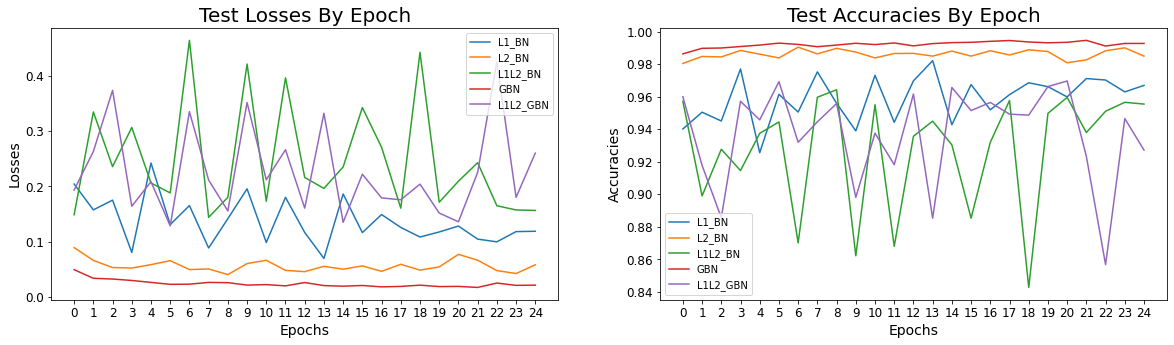

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))


axes[0].plot(xaxis, loss_l1_bn, label="L1_BN")
axes[0].plot(xaxis, loss_l2_bn, label="L2_BN")
axes[0].plot(xaxis, loss_l1l2_bn, label="L1L2_BN")
axes[0].plot(xaxis, loss_gbn, label="GBN")
axes[0].plot(xaxis, loss_l1l2_gbn, label="L1L2_GBN")
axes[0].set_title("Test Losses By Epoch", fontsize=20)
axes[0].set_xlabel("Epochs", fontsize=14)
axes[0].set_ylabel("Losses", fontsize=14)
axes[0].set_xticks(xaxis)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].legend()

axes[1].plot(xaxis, acc_l1_bn, label="L1_BN")
axes[1].plot(xaxis, acc_l2_bn, label="L2_BN")
axes[1].plot(xaxis, acc_l1l2_bn, label="L1L2_BN")
axes[1].plot(xaxis, acc_gbn, label="GBN")
axes[1].plot(xaxis, acc_l1l2_gbn, label="L1L2_GBN")
axes[1].set_title("Test Accuracies By Epoch", fontsize=20)
axes[1].set_xlabel("Epochs", fontsize=14)
axes[1].set_ylabel("Accuracies", fontsize=14)
axes[1].set_xticks(xaxis)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].legend()


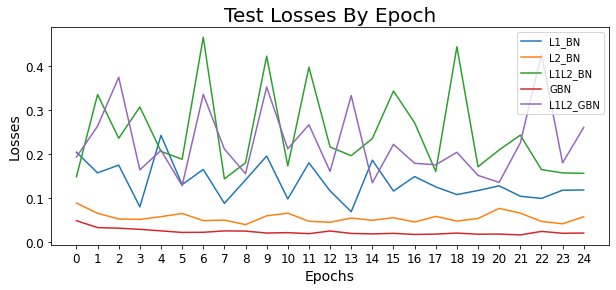

In [18]:
# Save Loss graph as an image:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

axes.plot(xaxis, loss_l1_bn, label="L1_BN")
axes.plot(xaxis, loss_l2_bn, label="L2_BN")
axes.plot(xaxis, loss_l1l2_bn, label="L1L2_BN")
axes.plot(xaxis, loss_gbn, label="GBN")
axes.plot(xaxis, loss_l1l2_gbn, label="L1L2_GBN")
axes.set_title("Test Losses By Epoch", fontsize=20)
axes.set_xlabel("Epochs", fontsize=14)
axes.set_ylabel("Losses", fontsize=14)
axes.set_xticks(xaxis)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.legend()

plt.savefig(anlt_folder+"loss_chart.png")

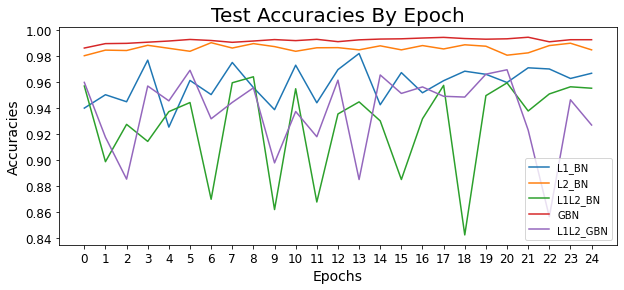

In [19]:
# Save Loss graph as an image:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

axes.plot(xaxis, acc_l1_bn, label="L1_BN")
axes.plot(xaxis, acc_l2_bn, label="L2_BN")
axes.plot(xaxis, acc_l1l2_bn, label="L1L2_BN")
axes.plot(xaxis, acc_gbn, label="GBN")
axes.plot(xaxis, acc_l1l2_gbn, label="L1L2_GBN")
axes.set_title("Test Accuracies By Epoch", fontsize=20)
axes.set_xlabel("Epochs", fontsize=14)
axes.set_ylabel("Accuracies", fontsize=14)
axes.set_xticks(xaxis)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.legend()

plt.savefig(anlt_folder+"acc_chart.png")

### Misclassified Images

In [14]:
rldd_model = with_gbn.Net()    #.to(device)
model_path = base_folder+model_file_names[-2]+"_sd.pth"
rldd_model.load_state_dict(torch.load(model_path))

imgs = []
targets = []
preds = []
for img, target in test_loader:
  imgs.append( img )
  targets.append( target )
  preds.append( torch.argmax(rldd_model(img), dim=1) )

imgs = torch.cat(imgs, dim=0)
targets = torch.cat(targets, dim=0)
preds = torch.cat(preds, dim=0)

matches = preds.eq(targets)

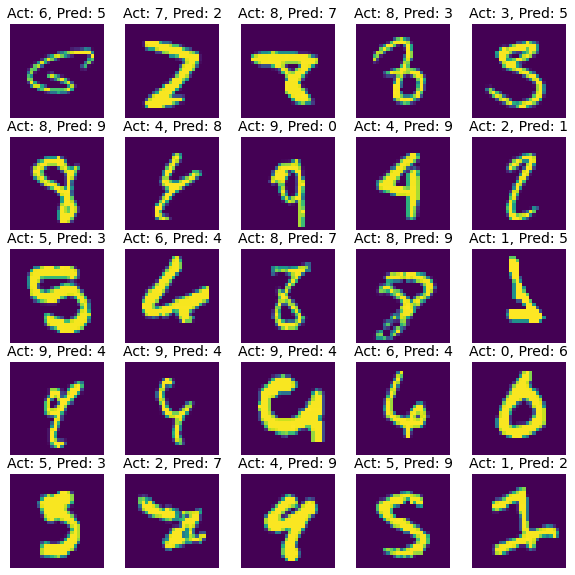

In [15]:
nrows, ncols = 5, 5
fig, axes = analytics.plot_misclassified(imgs=imgs, 
                                         targets=targets, 
                                         preds=preds, 
                                         nrows=nrows, 
                                         ncols=ncols, 
                                         skip=0,
                                         plt_scaler=(2,2),
                                         plt_fsize=14)
fig.savefig(anlt_folder+"misclassified_images.png")